# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
import torch

import agents

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [30]:
#Neural net architecture
HIDDEN_DIM_1 = 64
HIDDEN_DIM_2 = 128

BUFFER_SIZE = int(1e5)      # replay buffer size
BATCH_SIZE = 128            # minibatch size
GAMMA = 0.95                # discount factor of rewards
TAU = 1e-3                  # How fast will the target network be updated (from local network) 
LR = 1e-4                   # learning rate
UPDATE_NN_EVERY = 1         # how often to update the network
EPISODES = 5000             # Mximum epsiodes
EPSILON = 1                 # Starting epsilon --> high number to enforce heavy exploration
EPSILON_MIN = 0.01          # Which epsilon to end up with
EPS_DECAY = 0.9999          # Decay rate
SEED = 42                   # Random seed for reproducibility ()


In [37]:
print_evry = 5

agent = agents.DDQNAgent(state_size=state_size,
                     action_size=action_size,
                     buffer_size=BUFFER_SIZE,
                     batch_size=BATCH_SIZE,
                     gamma=GAMMA,
                     tau=TAU,
                     lr=LR,
                     hidden_1=HIDDEN_DIM_1,
                     hidden_2=HIDDEN_DIM_2,
                     update_every=UPDATE_NN_EVERY,
                     epsilon=EPSILON,
                     epsilon_min=EPSILON_MIN,
                     eps_decay=EPS_DECAY,
                     seed=SEED
                     )

# agent = agents.DQNAgent(state_size=state_size,
#                      action_size=action_size,
#                      buffer_size=BUFFER_SIZE,
#                      batch_size=BATCH_SIZE,
#                      gamma=GAMMA,
#                      tau=TAU,
#                      lr=LR,
#                      hidden_1=HIDDEN_DIM_1,
#                      hidden_2=HIDDEN_DIM_2,
#                      update_every=UPDATE_NN_EVERY,
#                      epsilon=EPSILON,
#                      epsilon_min=EPSILON_MIN,
#                      eps_decay=EPS_DECAY,
#                      seed=SEED
#                      )

average_reward = []

for episode in range(EPISODES):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0

    while True:
        try:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            agent.step(state, action, reward, next_state, done)
            state = next_state     

            if done:                                       # exit loop if episode finished
                average_reward.append(score)
                break
                
        except KeyboardInterrupt:
            break

    # monitor progress
    if episode % print_evry == 0:
        reward_last_100 = np.mean(average_reward[-99:])
        last_rewards = np.mean(average_reward[-print_evry:])
        
        print(f"Episode {episode}, "
              f"eps:{agent.epsilon:.3f}, "
              f"last_rewards: {last_rewards:.2f}, "
              f" avg_rewards:{reward_last_100:.2f}")

        if reward_last_100 >= 13:
            print(f"Solved in {episode} epsiodes")
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            env.close()
            break
                



Episode 0, eps:0.954, last_rewards: 4.00,  avg_rewards:4.00
Episode 5, eps:0.707, last_rewards: -0.20,  avg_rewards:0.50
Episode 10, eps:0.523, last_rewards: 0.80,  avg_rewards:0.64
Episode 15, eps:0.388, last_rewards: 1.80,  avg_rewards:1.00
Episode 20, eps:0.287, last_rewards: 1.40,  avg_rewards:1.10
Episode 25, eps:0.213, last_rewards: 1.60,  avg_rewards:1.19
Episode 30, eps:0.158, last_rewards: 3.20,  avg_rewards:1.52
Episode 35, eps:0.117, last_rewards: 3.20,  avg_rewards:1.75
Episode 40, eps:0.087, last_rewards: 3.60,  avg_rewards:1.98
Episode 45, eps:0.064, last_rewards: 5.60,  avg_rewards:2.37
Episode 50, eps:0.047, last_rewards: 7.80,  avg_rewards:2.90
Episode 55, eps:0.035, last_rewards: 5.20,  avg_rewards:3.11
Episode 60, eps:0.026, last_rewards: 7.00,  avg_rewards:3.43
Episode 65, eps:0.019, last_rewards: 6.00,  avg_rewards:3.62
Episode 70, eps:0.014, last_rewards: 8.80,  avg_rewards:3.99
Episode 75, eps:0.011, last_rewards: 11.00,  avg_rewards:4.45
Episode 80, eps:0.010, l

In [32]:
N = 100
cumsum, moving_aves = [0], []

for i, x in enumerate(average_reward, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

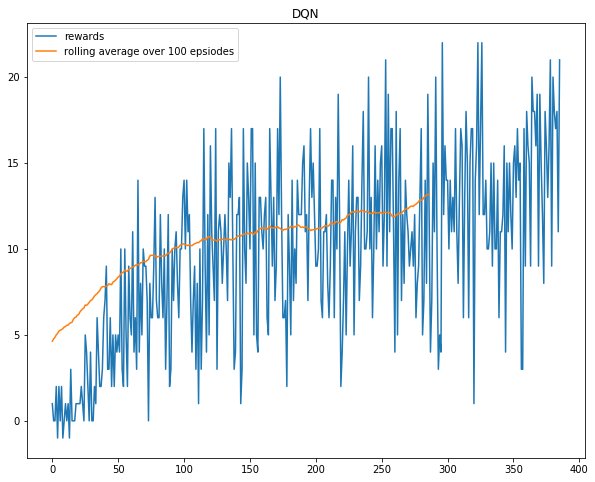

In [33]:
plt.figure(figsize=(10,8))
rewards = plt.plot(average_reward, label='rewards')
averages = plt.plot(moving_aves, label='rolling average over 100 epsiodes')
plt.title('DQN')
plt.legend();